In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [80]:
random_seed = 42

# Load Data

In [81]:
train = pd.read_csv('train.csv')

In [82]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
train.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [84]:
pd.unique(train.label)

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

# Preprocessing

## Missing values

In [85]:
pd.isnull(train).sum().sum()

0

## Split data X, target y

In [86]:
X = train.drop(['label'], axis=1)
y = train.label

In [87]:
X.values.shape

(42000, 784)

## Standardize/Normalize X variables

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [89]:
# standardization scaler
#st_scaler = StandardScaler() 
# normalization scaler
n_scaler = MinMaxScaler()
# standardize x
#X = st_scaler.fit_transform(X)
# normalize x
X = n_scaler.fit_transform(X)

C:\Users\pgrig\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Reshape data X 

In [90]:
X = X.reshape(-1,28,28,1) # x rows of (28x28x1) pixels images (1 <- number of colors (3 = RGB images))

In [91]:
X.shape

(42000, 28, 28, 1)

## One hot encode Target Variable

In [92]:
from keras.utils.np_utils import to_categorical   

In [93]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [94]:
y = to_categorical(y, num_classes=np.unique(y).shape[0], dtype = 'int')

In [95]:
y

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [96]:
y.shape

(42000, 10)

## Train/Validation set split

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=random_seed, test_size=0.3)

## Example plot

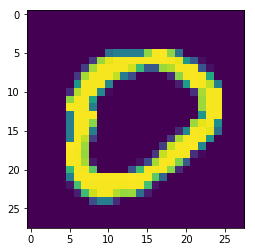

In [99]:
plt.imshow(X_train[10][:,:,0])

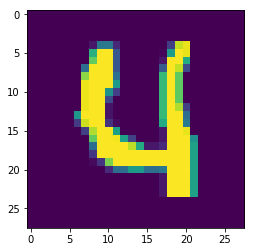

In [100]:
plt.imshow(X_train[113][:,:,0])

# CNN neural network

In [101]:
from keras import models
from keras import layers

In [518]:
batch_size = 64
epochs = 20
input_shape = (28, 28, 1)

In [623]:
# basis of convolutional network
model = models.Sequential()
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
#model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(layers.Dropout(0.1))

In [624]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 14, 14, 64)        0         
Total params: 640
Trainable params: 640
Non-trainable params: 0
_________________________________________________________________


In [625]:
# pass to fully connected layer
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [626]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_37 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_67 (Dense)             (None, 128)               1605760   
_________________________________________________________________
dense_68 (Dense)             (None, 10)                1290      
Total params: 1,607,690
Trainable params: 1,607,690
Non-trainable params: 0
_________________________________________________________________


In [627]:
from keras import optimizers

In [629]:
# Define the optimizer
#optimizer = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
optimizer = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [630]:
# Compile the model
model.compile(optimizer = optimizer,
              loss = "categorical_crossentropy", 
              metrics=["accuracy"])

In [631]:
from keras.callbacks import ReduceLROnPlateau

In [632]:
# Define callback for learning rate reduction
reduce_lr = ReduceLROnPlateau(monitor='val_acc', 
                              factor=0.1,
                              patience=2, 
                              verbose=1,
                              mode = 'max',
                              min_lr=0.0000001)

In [633]:
# don't fit model if you will later fit it after augmentation

h = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), 
              batch_size=batch_size, 
              epochs=epochs, 
              verbose=1,
              callbacks = [reduce_lr]
             )

Train on 29400 samples, validate on 12600 samples
Epoch 1/20
29400/29400 [==============================] - 78s 3ms/step - loss: 0.2281 - acc: 0.9337 - val_loss: 0.0910 - val_acc: 0.9723
Epoch 2/20
29400/29400 [==============================] - 77s 3ms/step - loss: 0.0722 - acc: 0.9786 - val_loss: 0.0845 - val_acc: 0.9740
Epoch 3/20
29400/29400 [==============================] - 78s 3ms/step - loss: 0.0456 - acc: 0.9853 - val_loss: 0.0683 - val_acc: 0.9799
Epoch 4/20
29400/29400 [==============================] - 78s 3ms/step - loss: 0.0286 - acc: 0.9915 - val_loss: 0.0608 - val_acc: 0.9810
Epoch 5/20
29400/29400 [==============================] - 82s 3ms/step - loss: 0.0188 - acc: 0.9948 - val_loss: 0.0613 - val_acc: 0.9817
Epoch 6/20
29400/29400 [==============================] - 78s 3ms/step - loss: 0.0142 - acc: 0.9956 - val_loss: 0.0678 - val_acc: 0.9808
Epoch 7/20
29400/29400 [==============================] - 78s 3ms/step - loss: 0.0099 - acc: 0.9971 - val_loss: 0.0678 - val_acc

In [ ]:
#model.evaluate(X_valid, y_valid)

# Data augmentation and re-run

In [432]:
from keras.preprocessing.image import ImageDataGenerator

In [433]:
# create data generator
datagen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization = False,
    zca_whitening = False,
    rotation_range = 0,
    width_shift_range = 0,
    height_shift_range = 0,
    brightness_range = [1, 1],
    shear_range = 0,
    zoom_range = [1, 1],
    fill_mode = 'nearest',
    horizontal_flip = False,
    vertical_flip = False,
    rescale = 0
)

In [434]:
#import os
#import shutil

In [435]:
# configure batch size and retrieve one batch of images
#shutil.rmtree(r'C:\Users\pgrig\Desktop\ML_practice\MNIST_digit_recognizer\augmented_images')
#os.makedirs('augmented_images')

#for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='augmented_images', save_prefix='aug', save_format='png'):
    # create a grid of 3x3 images
#    for i in range(0, 9):
#        plt.subplot(330 + 1 + i)
#        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
#    plt.show()
#    break

In [436]:
# the data generator to our data
datagen.fit(X_train)

In [437]:
data_flow = datagen.flow(X_train, y_train, 
                         batch_size = batch_size, 
                         shuffle = False)

In [438]:
history = model.fit_generator(data_flow, 
                              validation_data = (X_valid, y_valid),
                              epochs = 20,
                              steps_per_epoch = X_train.shape[0]//batch_size,
                              verbose = 1,
                              shuffle = False)

Epoch 1/20
459/459 [==============================] - 81s 177ms/step - loss: 14.4692 - acc: 0.1021 - val_loss: 5.2291 - val_acc: 0.1075
Epoch 2/20
459/459 [==============================] - 85s 185ms/step - loss: 14.4739 - acc: 0.1020 - val_loss: 5.2291 - val_acc: 0.1075
Epoch 3/20
458/459 [============================>.] - ETA: 0s - loss: 14.4780 - acc: 0.1018

KeyboardInterrupt: 

In [ ]:
#gen_loss, gen_acc = model.evaluate_generator(data_flow, 
#                                             steps=X_train.shape[0]//batch_size,
#                                             verbose = 1)

# Plot accuracy and cost history

In [530]:
from keras.callbacks import History 

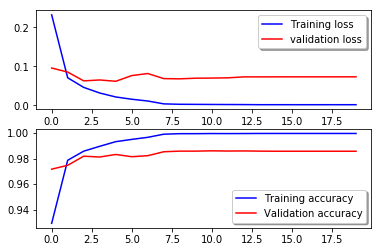

In [532]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)

ax[0].plot(h.history['loss'], color='b', label="Training loss")
ax[0].plot(h.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(h.history['acc'], color='b', label="Training accuracy")
ax[1].plot(h.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# Make predictions on test data

In [533]:
test = pd.read_csv('test.csv')

In [534]:
test = n_scaler.fit_transform(test)

C:\Users\pgrig\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [536]:
test = test.reshape(-1,28,28,1) # x rows of (28x28x1) pixels images (1 <- number of colors (3 = RGB images))

In [537]:
test.shape

(28000, 28, 28, 1)

In [555]:
# predict on test set
test_pred = model.predict(test)

In [556]:
test_pred = np.argmax(test_pred, axis = 1)

In [557]:
test_pred = pd.Series(test_pred, name="Label")

In [558]:
test_pred.head(10)

0    2
1    0
2    9
3    9
4    3
5    7
6    0
7    3
8    0
9    3
Name: Label, dtype: int64

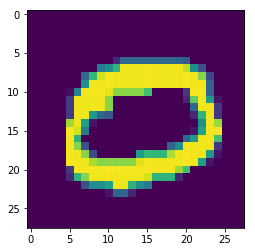

In [542]:
plt.imshow(test[1][:,:,0])

In [559]:
submission = pd.concat([pd.Series(range(1,28001), name = "ImageId"), test_pred], axis = 1)

In [560]:
submission.to_csv("submission.csv",index=False)